In [170]:
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
import sklearn.metrics as metrics
import scipy.sparse as sparse
import seaborn as sns

# figure size in inches
sns.set(font_scale=1.4,style="white",rc={'figure.figsize': (10,7)}) 

In [124]:
# emotion data set
X_train, y_train, feature_names, label_names = load_dataset('emotions', 'train')
X_test, y_test, _, _ = load_dataset('emotions', 'test')

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [143]:
label_kind_map = [(chr(i+65),label_kind[i]) for i in range(len(label_kind))]
label_genre=[]
for ins in y_train.todense():
    for k in label_kind_map:
        if np.array_equiv(ins,k[1]):
            label_genre.append(k[0])

In [162]:
def label_kind_map_name(genre_letter):
    arr=dict(label_kind_map)[genre_letter]
    z=[]
    for i in range(len(arr)):
        if arr[i] == 1:
            z.append(label_names[i][0])
    return ", ".join(z)

Text(0.5, 1.0, 'Label Counts')

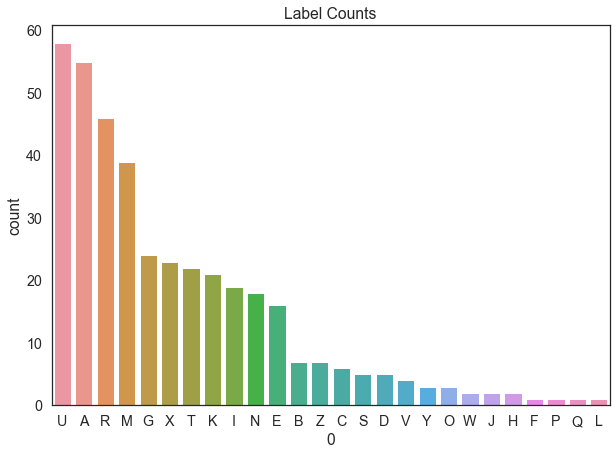

In [139]:
ax = sns.countplot(data=pd.DataFrame(label_genre), x=0, order=pd.DataFrame(label_genre)[0].value_counts().index)
ax.set_title("Label Counts")

In [108]:
from sklearn.cluster import KMeans

data_set = pd.DataFrame(y_train.todense(),columns=[label_names[x][0] for x in range(y_train.shape[1])])

estimator = KMeans(n_clusters=4)
estimator.fit(data_set)

r = pd.concat([data_set, pd.Series(estimator.labels_, index=data_set.index)], axis=1)
r.columns = list(data_set.columns) + ["cluster"]

from sklearn.manifold import TSNE

t_sne = TSNE()
t_sne.fit(data_set)
t_sne = pd.DataFrame(t_sne.embedding_, index=data_set.index)
t_sne.columns=["v1","v2"]
t_sne["group"]=estimator.labels_

data_set_label_genre = []
for i in range(len(data_set)):
    for k in label_kind_map:
        if np.array_equiv(data_set.iloc[i].to_numpy(),k[0]):
            data_set_label_genre.append(k[1])
t_sne["genre"] = data_set_label_genre

<AxesSubplot:xlabel='v1', ylabel='v2'>

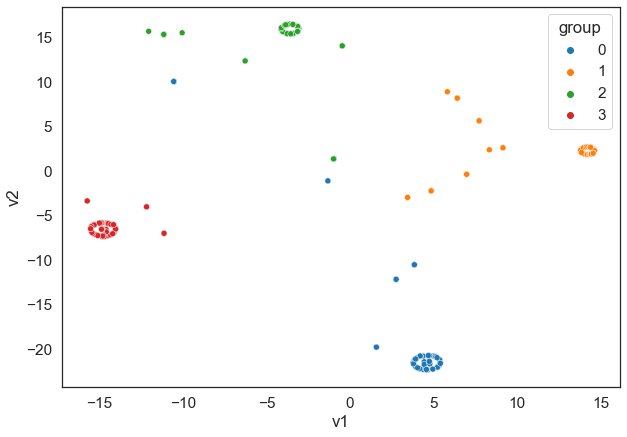

In [173]:
sns.scatterplot(data=t_sne, x="v1", y="v2",hue="group",palette="tab10")

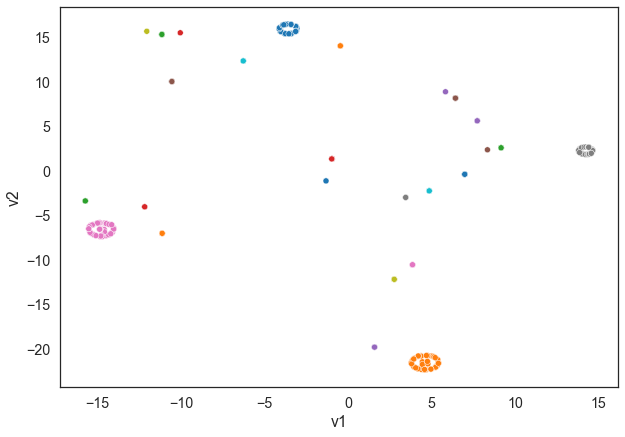

In [110]:
ax = sns.scatterplot(data=t_sne, x="v1", y="v2",hue="genre",palette="tab10")
ax.legend_.remove()

In [178]:
def plot_group_counts(k):
    df = t_sne[t_sne["group"] == k]
    ax = sns.countplot(data=df, x='genre', order=df.genre.value_counts().index)
    ax.set_title("Counts in Group " + str(k))
    for genre_letter in df.genre.value_counts().keys():
        print(genre_letter, label_kind_map_name(genre_letter))

U amazed-suprised, angry-aggresive
X amazed-suprised, happy-pleased
T amazed-suprised
V amazed-suprised, sad-lonely
Y amazed-suprised, happy-pleased, angry-aggresive
W amazed-suprised, relaxing-calm


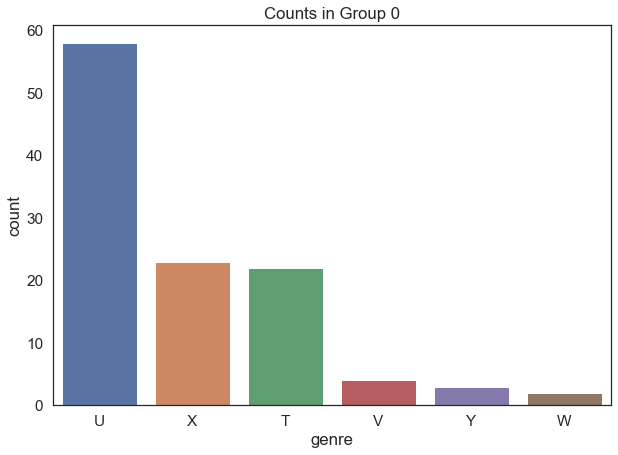

In [179]:
plot_group_counts(0)

M relaxing-calm, quiet-still, sad-lonely
K relaxing-calm, quiet-still
I relaxing-calm, sad-lonely
E quiet-still, sad-lonely
B sad-lonely
D quiet-still
J relaxing-calm, sad-lonely, angry-aggresive
L relaxing-calm, quiet-still, angry-aggresive
F quiet-still, sad-lonely, angry-aggresive


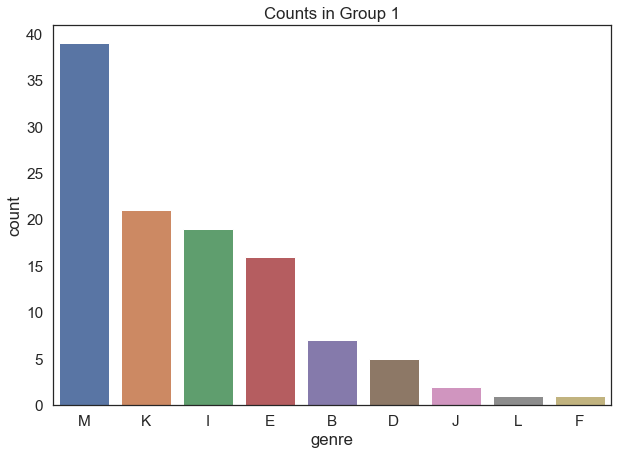

In [180]:
plot_group_counts(1)

R happy-pleased, relaxing-calm
G relaxing-calm
N happy-pleased
Z amazed-suprised, happy-pleased, relaxing-calm
S happy-pleased, relaxing-calm, quiet-still
P happy-pleased, sad-lonely
Q happy-pleased, quiet-still


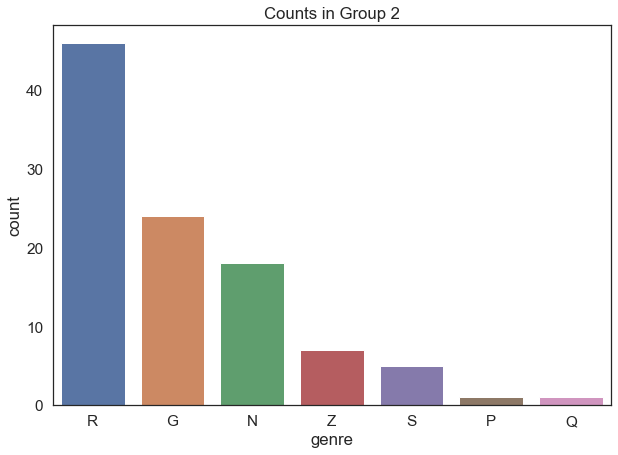

In [181]:
plot_group_counts(2)

A angry-aggresive
C sad-lonely, angry-aggresive
O happy-pleased, angry-aggresive
H relaxing-calm, angry-aggresive


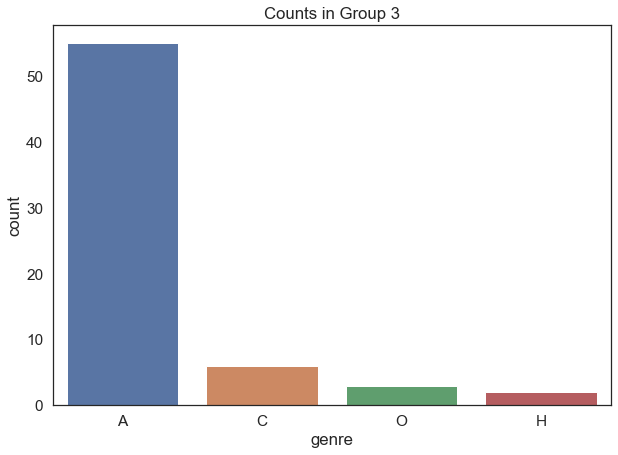

In [182]:
plot_group_counts(3)